# House Prices

Project ownership : Vincent Boettcher's notebook.

Goal : Predict the sales price for each house in Ames, Iowa. For each Id in the test set, you must predict the value of the SalePrice variable.

Metric : Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Dataframe details

This dataframe uses US metrics such as square feet.

For understanding purposes outside of the US, these metrics will be converted to the metric system using the following tables:

Square feet = 1
Square meters = 0.09290304

## Imports

In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Imports de scikit-learn
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler, OrdinalEncoder

# Imports spécifiques pour les pipelines
from sklearn import pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

## Data analysis

### Size, shape, quantity and type of data

In [255]:
# Importing training data
dataset_origin = pd.read_csv("Data/train.csv")
dataset_origin.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [256]:
# Copying the original dataframe to keep a copy untouched
dataset = dataset_origin.copy()

In [257]:
# Looking at the shape of the dataframe
print(f"Shape of the dataframe: \n {dataset.shape}\n")
print(f"Column names: \n {dataset.columns}\n")

Shape of the dataframe: 
 (1460, 81)

Column names: 
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'Garag

In [258]:
dataset.set_index('Id', inplace = True)

In [259]:
print(f"Column names, Non-Null Count and type of data: \n {dataset.info()}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Total of columns : 81
Total of rows : 1460
Total of data types : float64(3), int64(35), object(43)
Data quantity : more or less 115k

The dataframe seems to contain a lot of extremely detailed categories regarding various types of properties and amenities.

Now let's have a look at an example of column with null values.

In [260]:
dataset["Alley"]

Id
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
       ... 
1456    NaN
1457    NaN
1458    NaN
1459    NaN
1460    NaN
Name: Alley, Length: 1460, dtype: object

Some columns seem to have null data. But when we look at the data description file given with the dataset, it seems that some data with the entry "NA" have been transformed to "NaN" in the dataframe. 

For example, in the data description file, the column "Alley" should have the following data : "NA" for "No alley access". Instead it was replaced by "NaN" for null.

We will have a look at these columns to make the appropriate modifications.

In [261]:
dataset_nan_values = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

for columns in dataset_nan_values:
    dataset[columns].fillna("NA", inplace = True)
    
print(f"Non-Null Count Verification: \n {dataset.info()}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [262]:
dataset.loc[:, dataset.isnull().any()]

,LotFrontage,MasVnrType,MasVnrArea,Electrical,GarageYrBlt
Id,,,,,
1,65.0,BrkFace,196.0,SBrkr,2003.0
2,80.0,None,0.0,SBrkr,1976.0
3,68.0,BrkFace,162.0,SBrkr,2001.0
4,60.0,None,0.0,SBrkr,1998.0
5,84.0,BrkFace,350.0,SBrkr,2000.0
...,...,...,...,...,...
1456,62.0,None,0.0,SBrkr,1999.0
1457,85.0,Stone,119.0,SBrkr,1978.0
1458,66.0,None,0.0,SBrkr,1941.0


"NaN" values have been replaced with "NA" when it was relevant - using the data description file given at the start of the project.

We now have the following columns with some null values :

LotFrontage, MasVnrType, MasVnrArea, Electrical, GarageYrBlt

In [263]:
dataset.loc[dataset["LotFrontage"].isnull(), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
8,60,RL,NaN,10382,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
13,20,RL,NaN,12968,Pave,NA,IR2,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,144000
15,20,RL,NaN,10920,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,GdWo,NA,0,5,2008,WD,Normal,157000
17,20,RL,NaN,11241,Pave,NA,IR1,Lvl,AllPub,CulDSac,...,0,NA,NA,Shed,700,3,2010,WD,Normal,149000
25,20,RL,NaN,8246,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,MnPrv,NA,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,20,RL,NaN,12546,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,4,2007,WD,Normal,182900
1432,120,RL,NaN,4928,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,10,2009,WD,Normal,143750
1442,120,RM,NaN,4426,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,5,2008,WD,Normal,149300


In [264]:
# Replacing "NaN" values in LotFrontage column with most frequent data
dataset["LotFrontage"] = dataset["LotFrontage"].fillna(
    dataset["LotFrontage"].value_counts().index[0])

# Verification
dataset.loc[dataset["LotFrontage"].isnull(), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [265]:
dataset.loc[dataset["MasVnrType"].isnull(), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
235,60,RL,60.0,7851,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,5,2010,WD,Normal,216500
530,20,RL,60.0,32668,Pave,NA,IR1,Lvl,AllPub,CulDSac,...,0,NA,NA,NA,0,3,2007,WD,Alloca,200624
651,60,FV,65.0,8125,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,5,2008,WD,Normal,205950
937,20,RL,67.0,10083,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,8,2009,WD,Normal,184900
974,20,FV,95.0,11639,Pave,NA,Reg,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,12,2008,New,Partial,182000
978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,11,2007,New,Partial,199900
1244,20,RL,107.0,13891,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2006,New,Partial,465000
1279,60,RL,75.0,9473,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,3,2008,WD,Normal,237000


In [266]:
# Replacing "NaN" values in MasVnrType column with most frequent data
dataset["MasVnrType"] = dataset["MasVnrType"].fillna(
    dataset["MasVnrType"].value_counts().index[0])

# Verification
dataset.loc[dataset["MasVnrType"].isnull(), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [267]:
dataset.loc[dataset["MasVnrArea"].isnull(), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
235,60,RL,60.0,7851,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,5,2010,WD,Normal,216500
530,20,RL,60.0,32668,Pave,NA,IR1,Lvl,AllPub,CulDSac,...,0,NA,NA,NA,0,3,2007,WD,Alloca,200624
651,60,FV,65.0,8125,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,5,2008,WD,Normal,205950
937,20,RL,67.0,10083,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,8,2009,WD,Normal,184900
974,20,FV,95.0,11639,Pave,NA,Reg,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,12,2008,New,Partial,182000
978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,11,2007,New,Partial,199900
1244,20,RL,107.0,13891,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2006,New,Partial,465000
1279,60,RL,75.0,9473,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,3,2008,WD,Normal,237000


In [268]:
# Replacing "NaN" values in MasVnrArea column with most frequent data
dataset["MasVnrArea"] = dataset["MasVnrArea"].fillna(
    dataset["MasVnrArea"].value_counts().index[0])

# Verification
dataset.loc[dataset["MasVnrArea"].isnull(), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [269]:
dataset.loc[dataset["Electrical"].isnull(), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1380,80,RL,73.0,9735,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,5,2008,WD,Normal,167500


In [270]:
# Replacing "NaN" values in Electrical column with most frequent data
dataset["Electrical"].fillna(dataset["Electrical"].mode()[0], inplace = True)

# Verification
dataset.loc[dataset["Electrical"].isnull(), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [271]:
dataset.loc[dataset["GarageYrBlt"].isnull(), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
40,90,RL,65.0,6040,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,6,2008,WD,AdjLand,82000
49,190,RM,33.0,4456,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,6,2009,New,Partial,113000
79,90,RL,72.0,10778,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2010,WD,Normal,136500
89,50,C (all),105.0,8470,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,MnPrv,NA,0,10,2009,ConLD,Abnorml,85000
90,20,RL,60.0,8070,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,12,2008,WD,Normal,122000
1408,20,RL,60.0,8780,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,MnPrv,NA,0,3,2009,WD,Normal,112000
1450,180,RM,21.0,1533,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,8,2006,WD,Abnorml,92000


In [272]:
# Replacing "NaN" values in Electrical column with most frequent data
dataset["GarageYrBlt"].fillna("YearBuilt", inplace = True) 

# Verification
dataset.loc[dataset["GarageYrBlt"].isnull(), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


Now that null values have been delt with, we will start building a correlation matrix.

First, we will encode non numerical data, meaning categorical data (or objects) in our dataframe.

In [279]:
dataset_corr = dataset.corr()
dataset_corr_filtered = dataset_corr[((dataset_corr >= .2) | (dataset_corr <= -.2)) & (dataset_corr !=1.000)]
dataset_corr_filtered.head()

/var/folders/16/l4xgjhw90qsftr1ws3c4f9zh0000gn/T/ipykernel_1906/2613578319.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_corr = dataset.corr()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,NaN,-0.349116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,-0.349116,NaN,0.281283,0.236891,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.329220
LotArea,NaN,0.281283,NaN,NaN,NaN,NaN,NaN,NaN,0.214103,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.263843
OverallQual,NaN,0.236891,NaN,NaN,NaN,0.572323,0.550684,0.407252,0.239666,NaN,...,0.238923,0.308819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790982
OverallCond,NaN,NaN,NaN,NaN,NaN,-0.375983,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


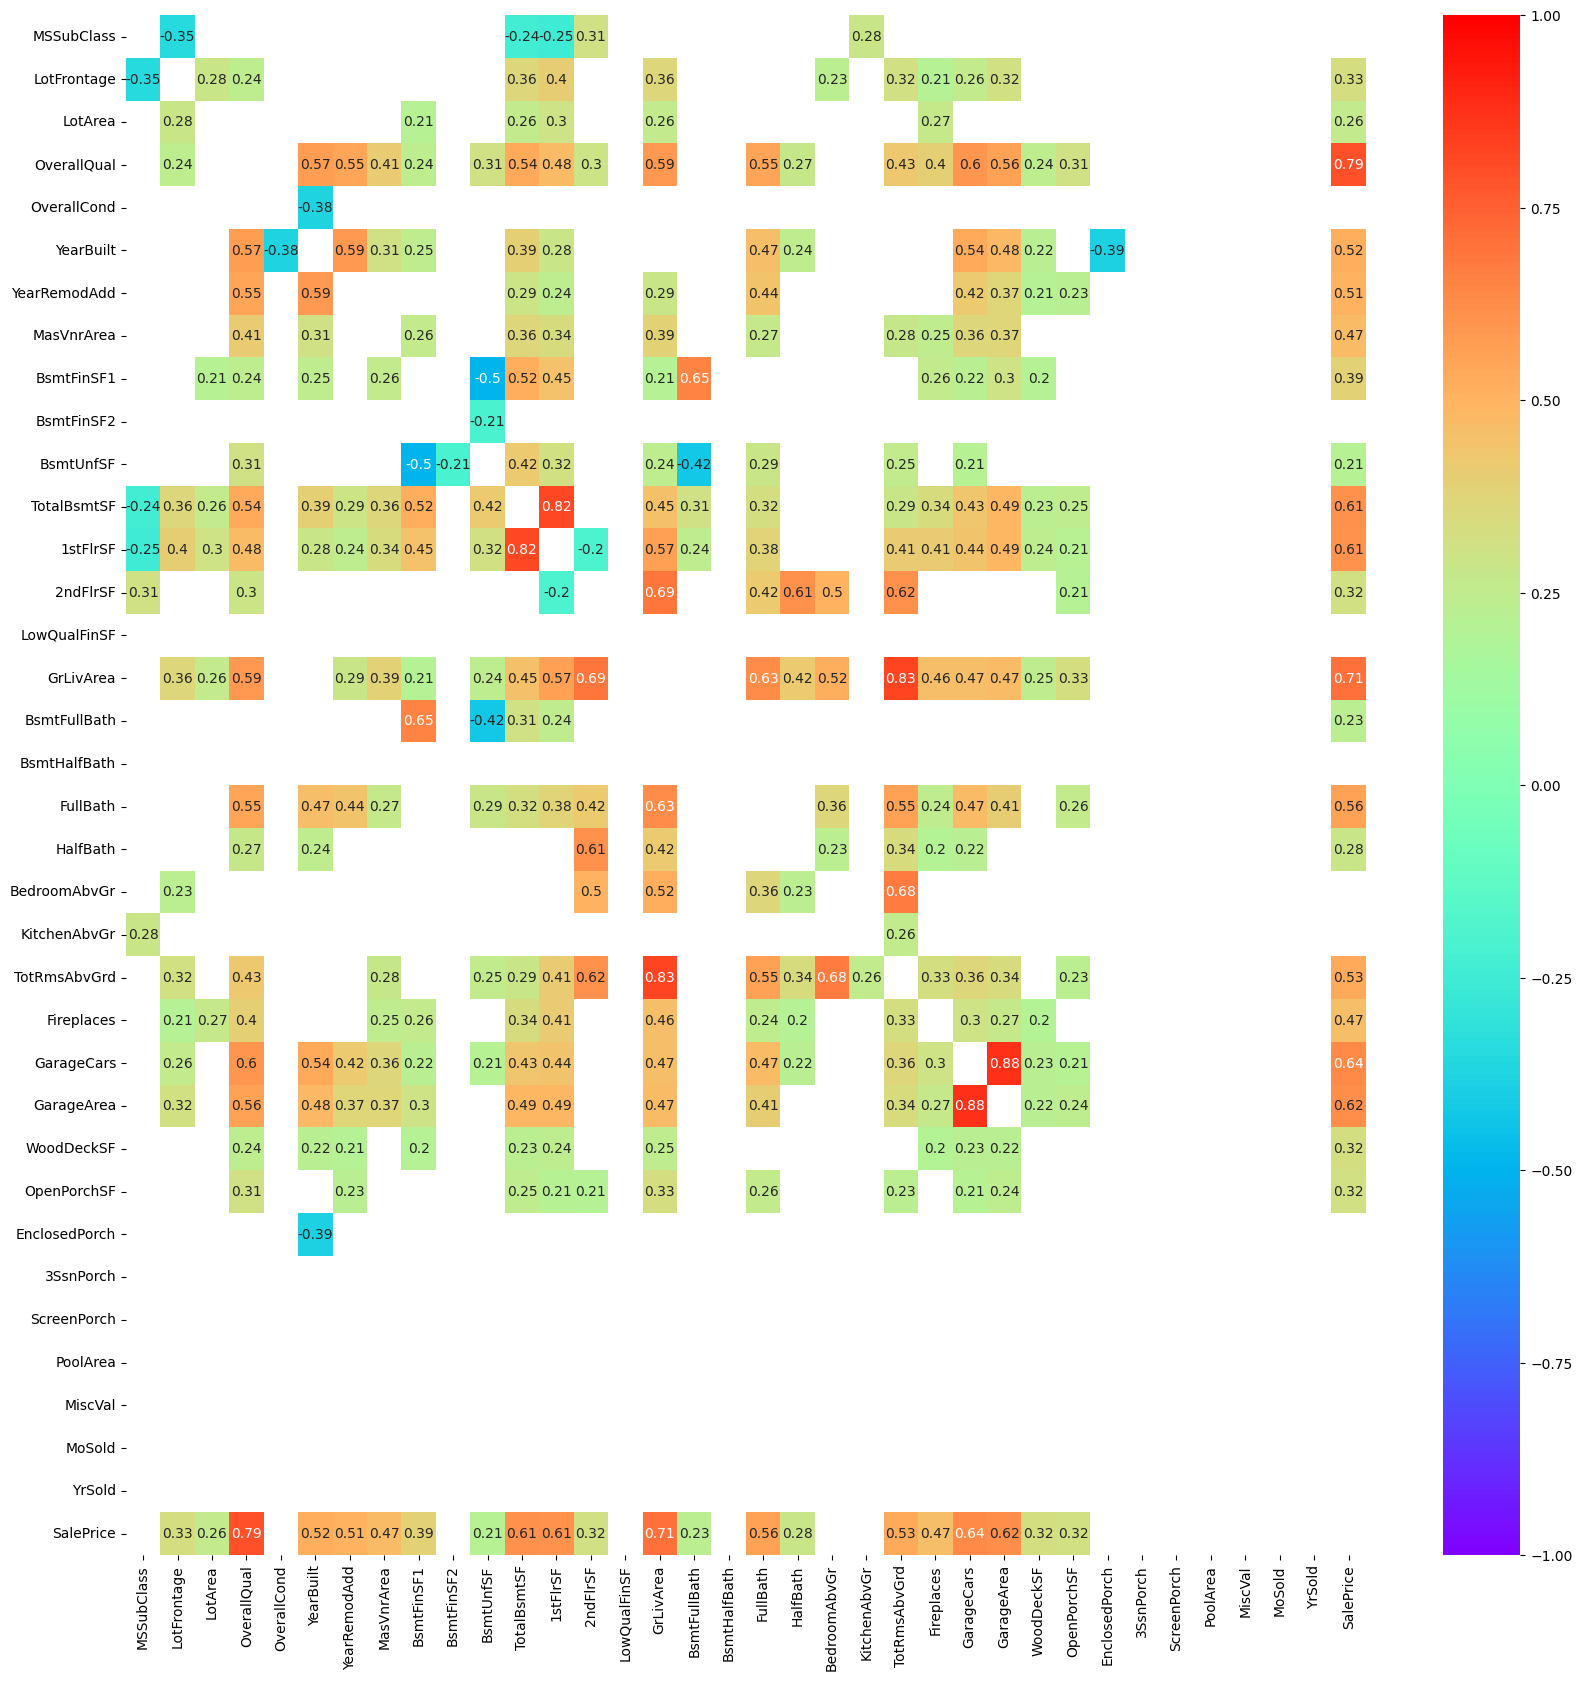

In [282]:
plt.figure(figsize = (20, 20))
plt.show(sns.heatmap(dataset_corr_filtered, vmin = -1, vmax = +1, annot = True, cmap = 'rainbow'))

In [275]:
#encoder = OrdinalEncoder()
#dataset['Sex'] = encoder.fit_transform(dataset['Sex'])

numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = make_column_selector(dtype_exclude=np.number)

preprocessor = make_column_transformer((RobustScaler(), numerical_features), (OrdinalEncoder(), categorical_features))

/var/folders/16/l4xgjhw90qsftr1ws3c4f9zh0000gn/T/ipykernel_1906/480461545.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.show(sns.heatmap(dataset.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm'))


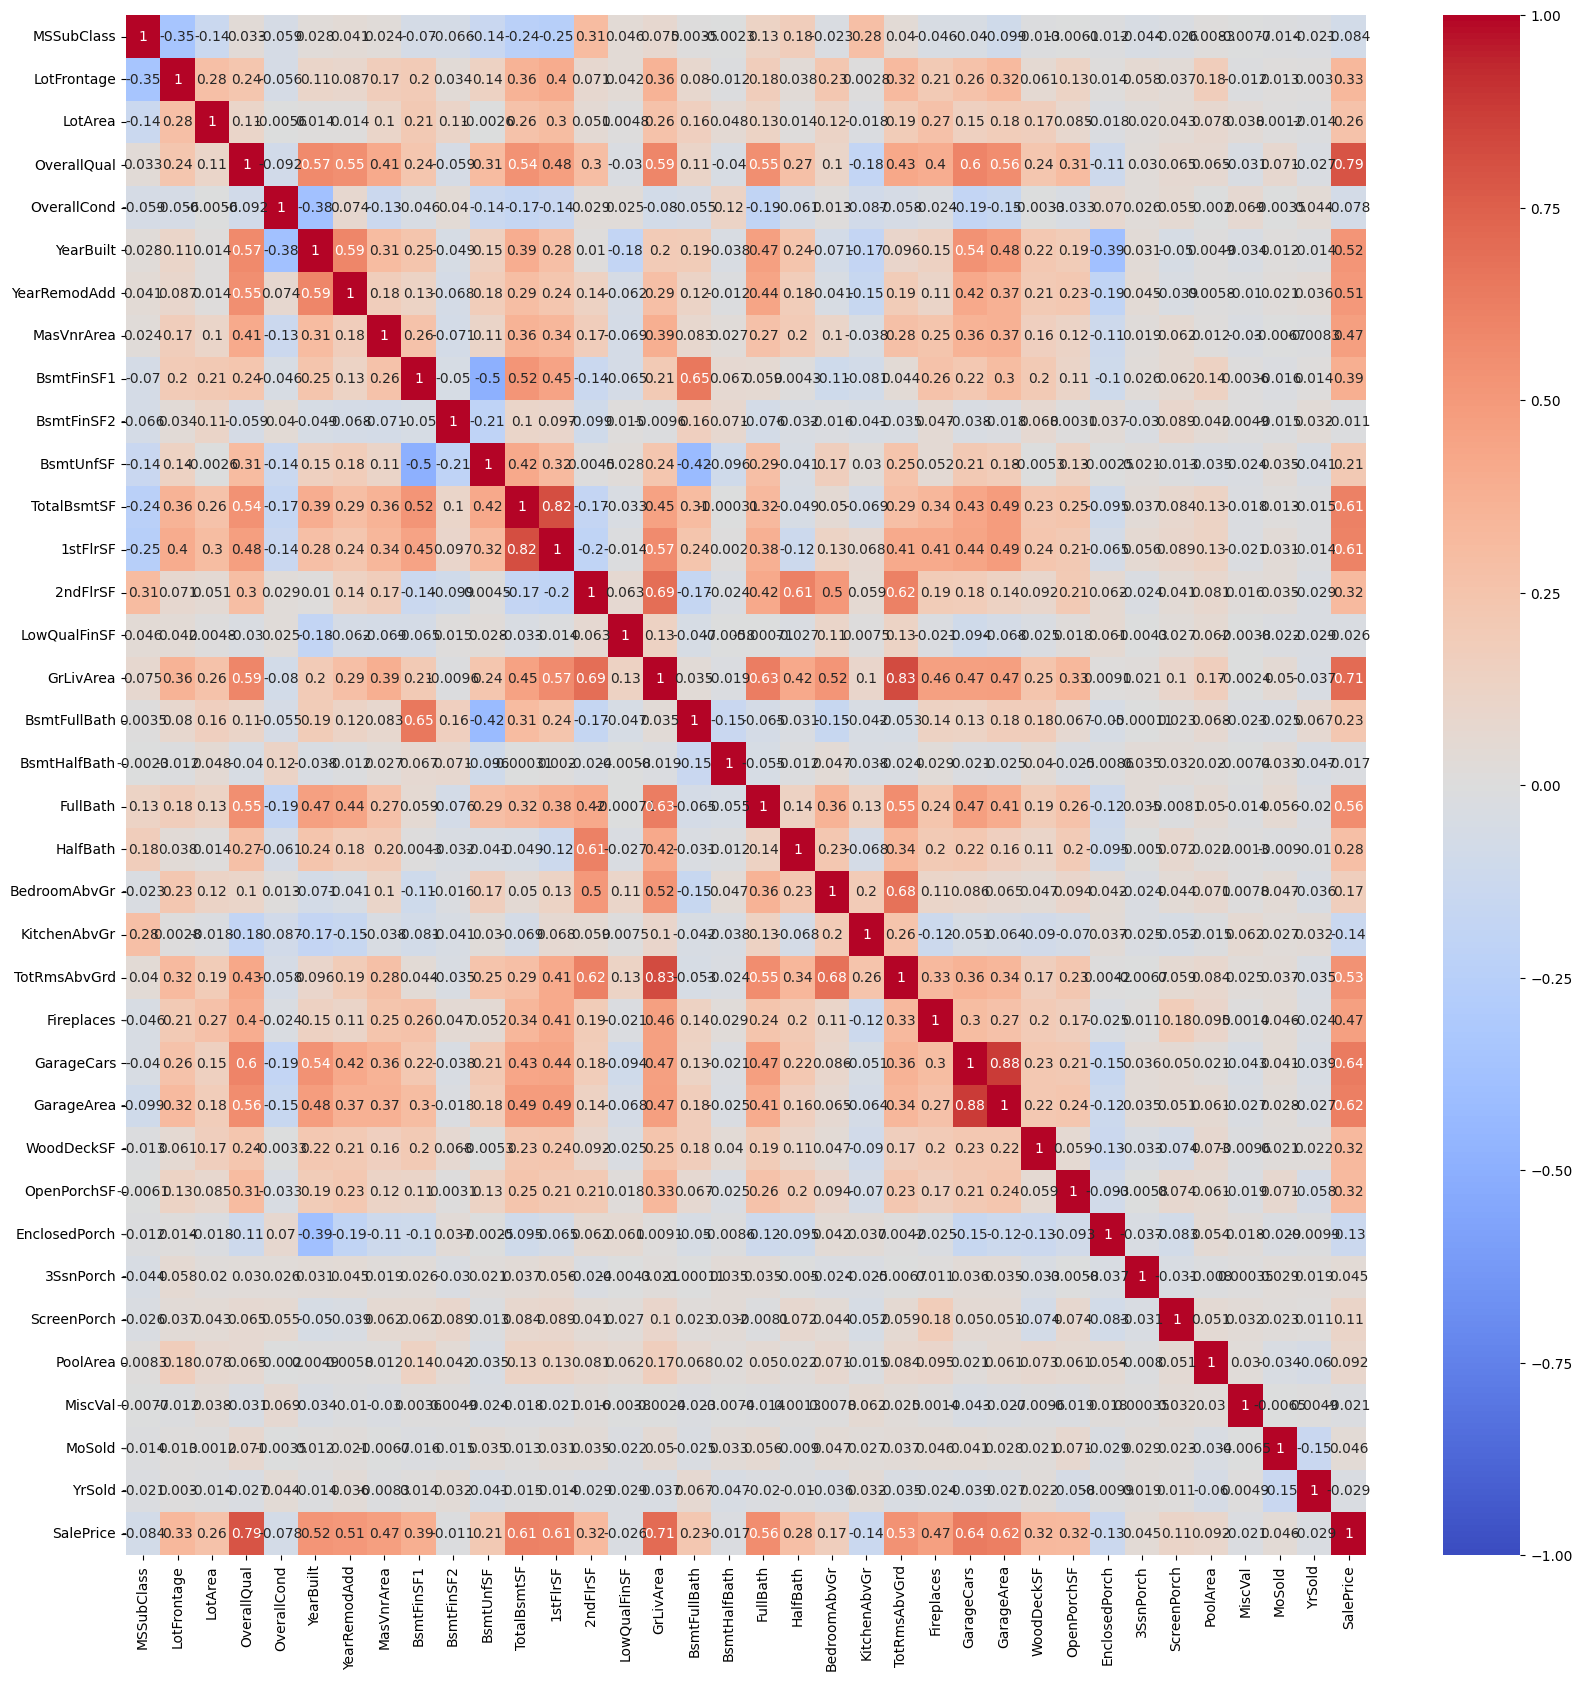

In [276]:
# Correlation matrice
plt.figure(figsize = (20, 20))
plt.show(sns.heatmap(dataset.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm'))

#### Grouping data in categories for visualization

It may be interesting to put some columns in similar categories. For example, columns "GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond" could all be put in a category labeled "Garage".

We'll explore that possibility and have a closer look at the data after making these categories.

In [277]:
dataset_interior = dataset.loc[:, ["Pclass", "Sex", "Age_label", "Age_Sex", "Survived"]]
dataset_interior

KeyError: "None of [Index(['Pclass', 'Sex', 'Age_label', 'Age_Sex', 'Survived'], dtype='object')] are in the [columns]"

In [ ]:
dataset_exterior = dataset.loc[:, ["Pclass", "Sex", "Age_label", "Age_Sex", "Survived"]]
dataset_exterior

In [ ]:
dataset_garage = dataset.loc[:, ["Id", "MSSubClass", "GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]]
dataset_garage